In [1]:
print("hello world")

hello world


In [2]:
def decompose_hangul(text):
    CHO = "ㄱㄲㄴㄷㄸㄹㅁㅂㅃㅅㅆㅇㅈㅉㅊㅋㅌㅍㅎ"
    JUNG = "ㅏㅐㅑㅒㅓㅔㅕㅖㅗㅘㅙㅚㅛㅜㅝㅞㅟㅠㅡㅢㅣ"
    JONG = [""] + list("ㄱㄲㄳㄴㄵㄶㄷㄹㄺㄻㄼㄽㄾㄿㅀㅁㅂㅄㅅㅆㅇㅈㅊㅋㅌㅍㅎ")

    HANGUL_BASE = 0xAC00
    CHO_BASE, JUNG_BASE, JONG_BASE = 588, 28, 1

    result = []
    for char in text:
        if '가' <= char <= '힣':  # 한글 완성형이면 분해
            code = ord(char) - HANGUL_BASE
            cho = CHO[code // CHO_BASE]
            jung = JUNG[(code % CHO_BASE) // JUNG_BASE]
            jong = JONG[(code % CHO_BASE) % JUNG_BASE]
            result.extend([cho, jung] + ([jong] if jong else []))
        else:
            result.append(char)  # 한글이 아니면 그대로 추가

    return result

# 테스트
text = "한글 키보드 테스트"
print(decompose_hangul(text))

['ㅎ', 'ㅏ', 'ㄴ', 'ㄱ', 'ㅡ', 'ㄹ', ' ', 'ㅋ', 'ㅣ', 'ㅂ', 'ㅗ', 'ㄷ', 'ㅡ', ' ', 'ㅌ', 'ㅔ', 'ㅅ', 'ㅡ', 'ㅌ', 'ㅡ']


In [4]:
def get_finger_usage(char, layout):
    """입력된 자모가 어느 손가락(finger), 손(hand), 몇 번째 행(row)에 위치하는지 반환"""
    if char in layout:
        key, finger, row = layout[char]
        hand = 'left' if 'left' in finger else 'right'
        return key, finger, hand, row
    return None, None, None, None  # 키보드에 없는 글자일 경우

from collections import Counter

def analyze_text(text, layout):
    decomposed = decompose_hangul(text)  # 한글을 초성, 중성, 종성으로 분해
    finger_usage = Counter()
    hand_usage = Counter()
    row_usage = Counter({1: 0, 2: 0, 3: 0})  # 1열, 2열, 3열 빈도

    prev_finger = None  # 동일 손가락 연타 분석용
    same_finger_count = 0
    shift_usage = Counter({'left_pinky': 0, 'right_pinky': 0})  # Shift 사용 통계

    for char in decomposed:
        key, finger, hand, row = get_finger_usage(char, layout)

        if finger:
            finger_usage[finger] += 1
            hand_usage[hand] += 1
            row_usage[row] += 1  # 키보드 행(row) 사용 빈도 증가

            # 동일 손가락 연타 검사
            if prev_finger == finger:
                same_finger_count += 1
            prev_finger = finger

        # Shift 키가 필요한 경우 반대 손 새끼손가락 사용
        if key and "shift_" in key:
            shift_hand = 'left_pinky' if hand == 'right' else 'right_pinky'
            shift_usage[shift_hand] += 1  # Shift 키 입력 횟수 증가

    return finger_usage, hand_usage, row_usage, same_finger_count, shift_usage

In [5]:
dubeolsik = {
    # 3열 (QWER)
    'ㅂ': ('q', 'left_pinky', 3), 'ㅈ': ('w', 'left_ring', 3),
    'ㄷ': ('e', 'left_middle', 3), 'ㄱ': ('r', 'left_index', 3),
    'ㅅ': ('t', 'left_index', 3), 'ㅛ': ('y', 'right_index', 3),
    'ㅕ': ('u', 'right_index', 3), 'ㅑ': ('i', 'right_middle', 3),
    'ㅐ': ('o', 'right_ring', 3), 'ㅔ': ('p', 'right_pinky', 3),

    # 2열 (ASDF) - 기본 위치
    'ㅁ': ('a', 'left_pinky', 2), 'ㄴ': ('s', 'left_ring', 2),
    'ㅇ': ('d', 'left_middle', 2), 'ㄹ': ('f', 'left_index', 2),
    'ㅎ': ('g', 'left_index', 2), 'ㅗ': ('h', 'right_index', 2),
    'ㅓ': ('j', 'right_index', 2), 'ㅏ': ('k', 'right_middle', 2),
    'ㅣ': ('l', 'right_ring', 2),

    # 1열 (ZXCV)
    'ㅋ': ('z', 'left_pinky', 1), 'ㅌ': ('x', 'left_ring', 1),
    'ㅊ': ('c', 'left_middle', 1), 'ㅍ': ('v', 'left_index', 1),
    'ㅠ': ('b', 'left_index', 1), 'ㅜ': ('n', 'right_index', 1),
    'ㅡ': ('m', 'right_index', 1),

    # Shift 조합
    'ㄲ': ('shift_q', 'left_pinky', 3), 'ㄸ': ('shift_e', 'left_middle', 3),
    'ㅃ': ('shift_q', 'left_pinky', 3), 'ㅆ': ('shift_t', 'left_index', 3),
    'ㅉ': ('shift_w', 'left_ring', 3),
}

In [10]:
text = "앉"
finger_stats, hand_stats, row_stats, same_finger_hits, shift_stats = analyze_text(text, dubeolsik)

print("손가락 사용 빈도:", finger_stats)
print("손 사용 비율:", hand_stats)
print("키보드 행(row) 사용 비율:", row_stats)
print("동일 손가락 연타 횟수:", same_finger_hits)
print("Shift 키 사용 횟수:", shift_stats)

손가락 사용 빈도: Counter({'left_middle': 1, 'right_middle': 1})
손 사용 비율: Counter({'left': 1, 'right': 1})
키보드 행(row) 사용 비율: Counter({2: 2, 1: 0, 3: 0})
동일 손가락 연타 횟수: 0
Shift 키 사용 횟수: Counter({'left_pinky': 0, 'right_pinky': 0})


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 키보드 레이아웃 (위치 지정)
keyboard_layout = [
    ['q', 'w', 'e', 'r', 't', '', 'y', 'u', 'i', 'o', 'p'],
    ['a', 's', 'd', 'f', 'g', '', 'h', 'j', 'k', 'l', ';'],
    ['z', 'x', 'c', 'v', 'b', '', 'n', 'm', ',', '.', '/']
]

# 키 위치 매핑
key_position_map = {key: (row, col) for row, line in enumerate(keyboard_layout) for col, key in enumerate(line) if key}

def create_heatmap(finger_stats, layout):
    """ 키보드 히트맵을 생성하는 함수 """
    heatmap = np.zeros((3, 11))  # 키보드 크기 (3행 x 11열)

    for char, (key, finger, row) in layout.items():
        if key in key_position_map:  # 키보드에 존재하는 키만 처리
            col = key_position_map[key]  # key_position_map에서 열 정보 가져오기
            heatmap[row-1, col] += finger_stats.get(finger, 0)  # 0부터 시작하는 index 맞추기

    plt.imshow(heatmap, cmap="Blues", interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(10), list("QWERTYUIOP"))  # 수정된 부분
    plt.yticks(range(3), ["1열", "2열", "3열"])
    plt.show()

/Users/jkywalker/Github/custom_keyboard_layout/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


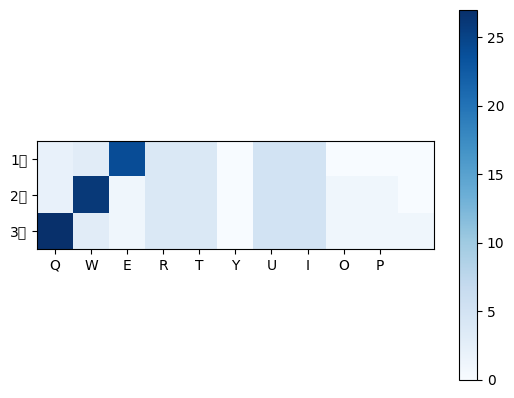

In [19]:
finger_stats, _, _, _, _ = analyze_text("한글 키보드 테스트", dubeolsik)
create_heatmap(finger_stats, dubeolsik)

/var/folders/3q/ws_lqxxd50z47w0yrdzmfwd40000gn/T/ipykernel_18037/2829616105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(hand_usage.keys()), y=list(hand_usage.values()), palette="coolwarm")
/Users/jkywalker/Github/custom_keyboard_layout/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jkywalker/Github/custom_keyboard_layout/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jkywalker/Github/custom_keyboard_layout/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) 

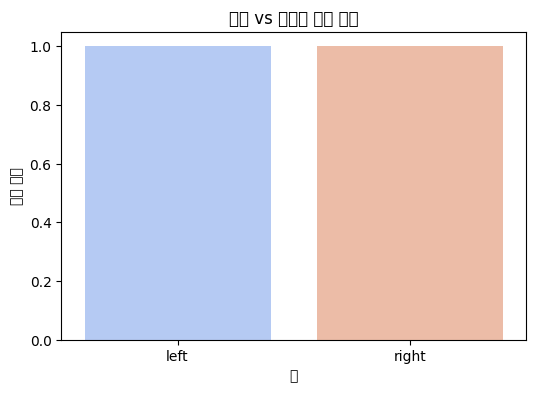

In [20]:
def plot_hand_usage(hand_usage):
    """ 왼손 vs 오른손 사용 비율 그래프 """
    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(hand_usage.keys()), y=list(hand_usage.values()), palette="coolwarm")
    plt.xlabel("손")
    plt.ylabel("사용 횟수")
    plt.title("왼손 vs 오른손 사용 비율")
    plt.show()

plot_hand_usage(hand_stats)

/var/folders/3q/ws_lqxxd50z47w0yrdzmfwd40000gn/T/ipykernel_18037/348572257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["1열", "2열", "3열"], y=[row_usage[1], row_usage[2], row_usage[3]], palette="coolwarm")
/Users/jkywalker/Github/custom_keyboard_layout/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jkywalker/Github/custom_keyboard_layout/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jkywalker/Github/custom_keyboard_layout/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54943 (\N{HANGUL SYLLA

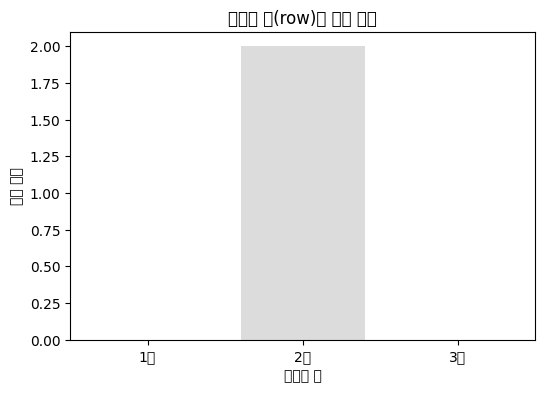

In [21]:
def plot_row_usage(row_usage):
    """ 키보드 행(row) 사용 비율 그래프 """
    plt.figure(figsize=(6, 4))
    sns.barplot(x=["1열", "2열", "3열"], y=[row_usage[1], row_usage[2], row_usage[3]], palette="coolwarm")
    plt.xlabel("키보드 행")
    plt.ylabel("사용 횟수")
    plt.title("키보드 행(row)별 사용 빈도")
    plt.show()

plot_row_usage(row_stats)